In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pandas as pd

# Instalar o pacote devtools, se ainda não estiver instalado
robjects.r('install.packages("devtools")')

# Carregar o pacote devtools
robjects.r('library(devtools)')

# Instalar o pacote mananciais
robjects.r('devtools::install_github("beatrizmilz/mananciais")')

# Carregar o pacote mananciais
robjects.r('library(mananciais)')

# Chamar a função dados_mananciais
robjects.r('mananciais <- mananciais::dados_mananciais()')

# Obter o dataframe em Python
mananciais_py = robjects.r('mananciais')

# Converter o dataframe R para um dataframe Pandas
mananciais_df = pandas2ri.rpy2py(mananciais_py) 

# Converter a coluna "Data" para datetime
mananciais_df['data'] = pd.to_datetime(mananciais_df['data'], unit='D', origin='1970-01-01')

# Filtrar para manter apenas dados de 01/01/2013 em diante.
filtro = mananciais_df['data'] > '2012-12-31'
dados_apos_2013 = mananciais_df[filtro]

# Salvar arquivo baixado e modificado em um csv.
dados_apos_2013.to_csv('mananciaisfiltrado.csv', index=False)

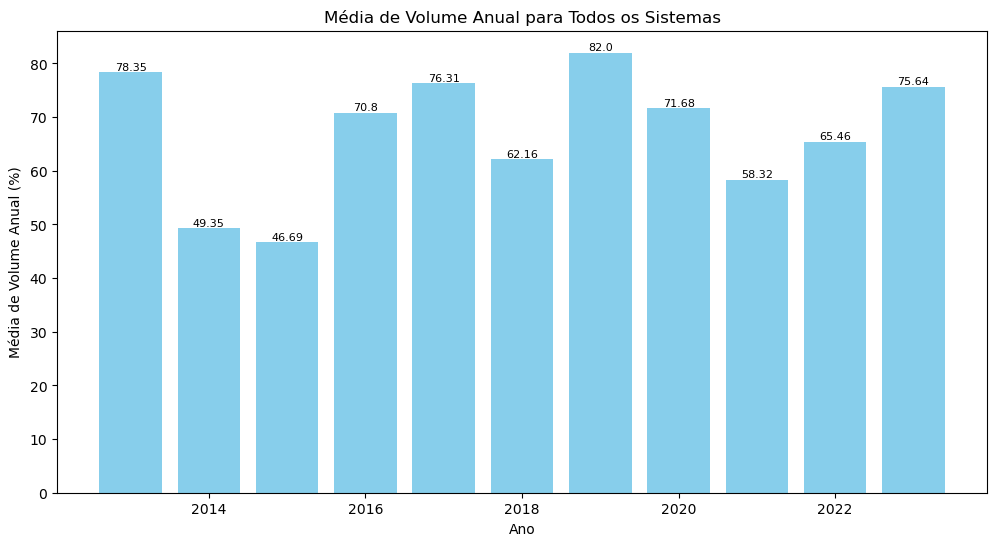

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Converter a coluna 'data' para datetime
dados_apos_2013['data'] = pd.to_datetime(dados_apos_2013['data'])

# Extrair o ano da coluna 'data'
dados_apos_2013['ano'] = dados_apos_2013['data'].dt.year

# Calcular a média de volume anual para todos os sistemas
media_volume_anual = dados_apos_2013.groupby('ano')['volume_porcentagem'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))

# Adicionar barras e rótulos
bars = plt.bar(media_volume_anual['ano'], media_volume_anual['volume_porcentagem'], color='skyblue')

# Adicionar rótulos em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.xlabel('Ano')
plt.ylabel('Média de Volume Anual (%)')
plt.title('Média de Volume Anual para Todos os Sistemas')
plt.show()

In [ ]:
#Gerar Dispersão

In [ ]:
#Gerar Histograma

In [ ]:
#Gerar Boxspot